# HEART DISEASE PREDICTION

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### EDA

In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [8]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


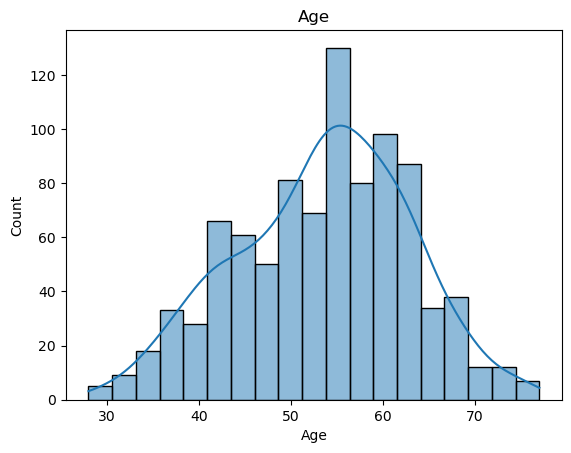

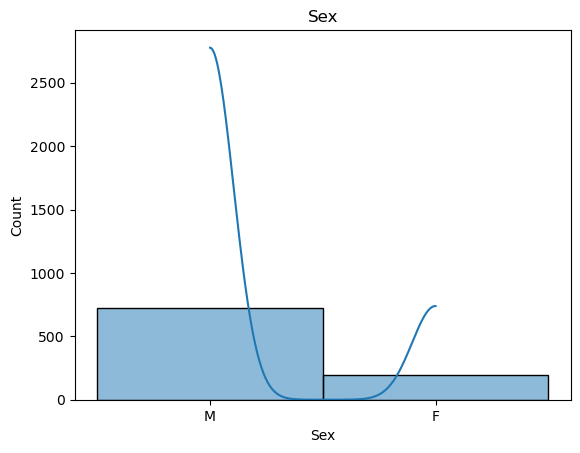

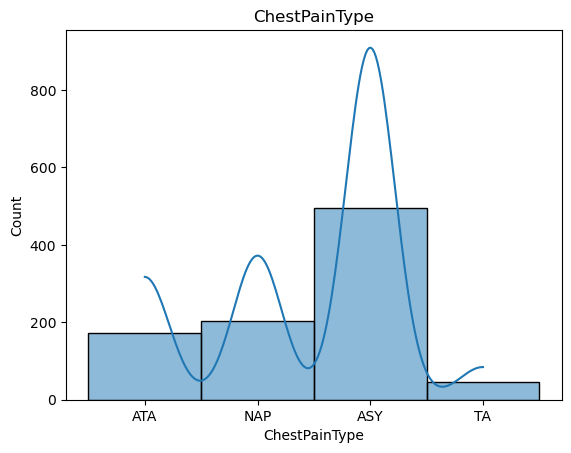

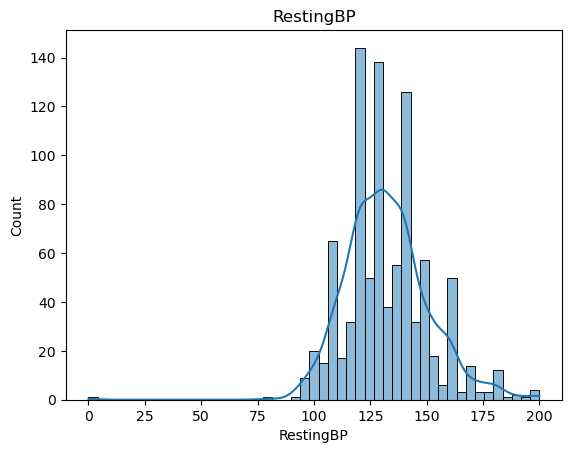

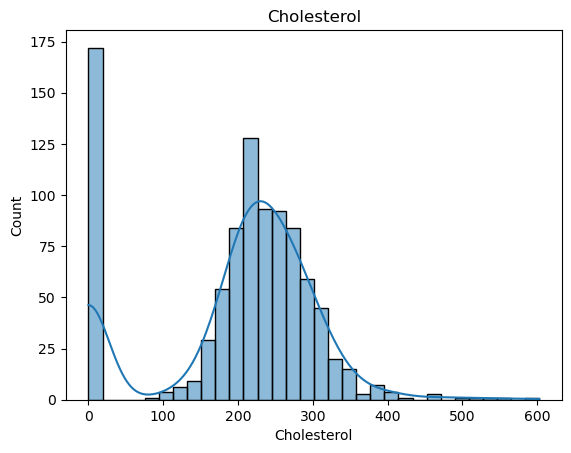

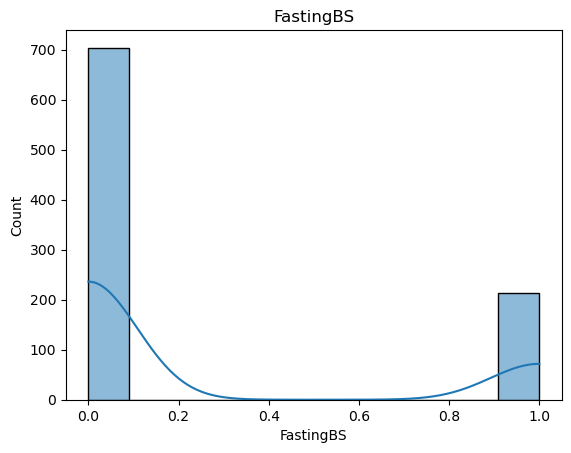

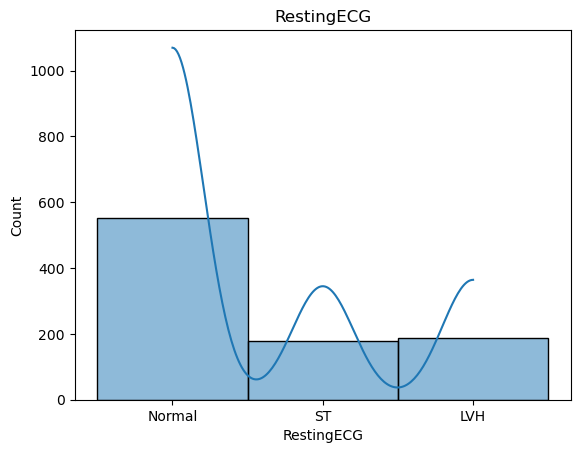

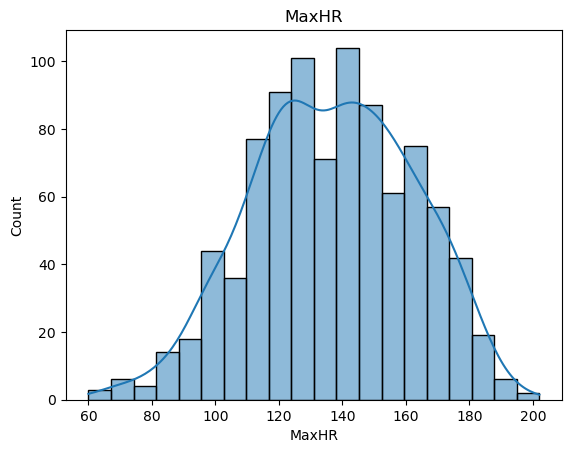

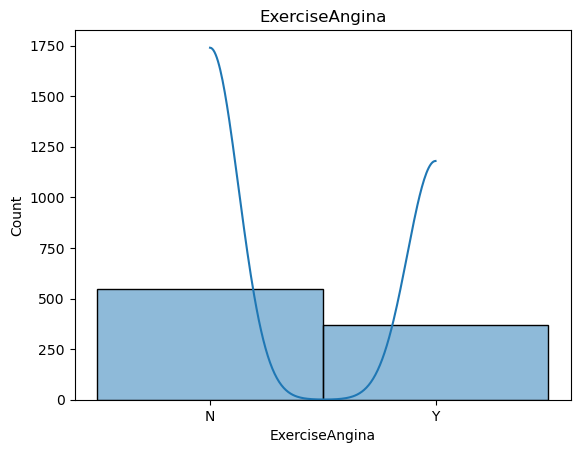

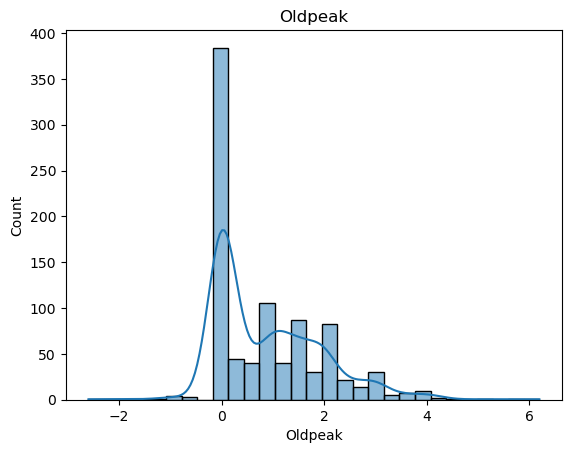

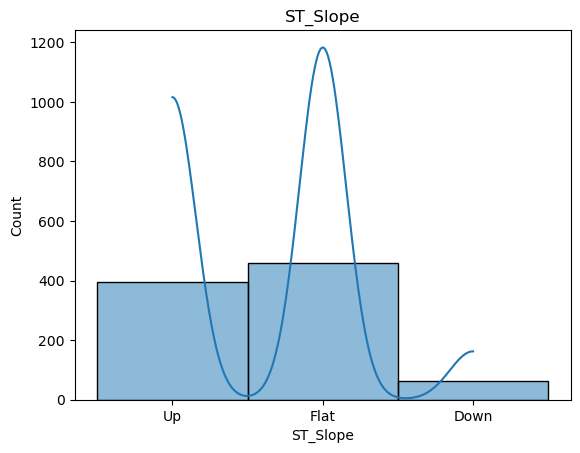

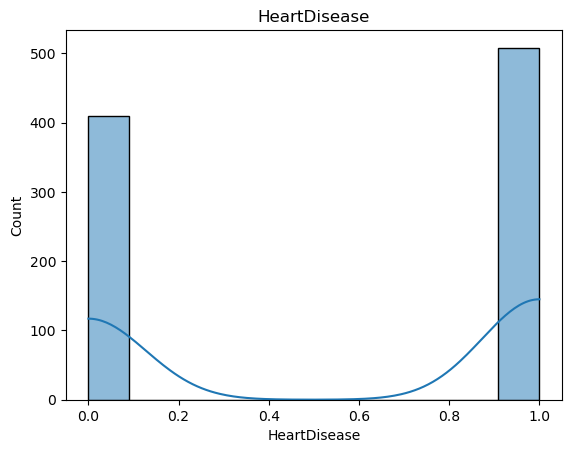

In [9]:
for col in df.columns:
    plt.figure()
    sns.histplot(df[col], kde= True)
    plt.title(col)

In [10]:
df["RestingBP"].value_counts().sort_index(ascending=False)

RestingBP
200     4
192     1
190     2
185     1
180    12
       ..
95      6
94      2
92      1
80      1
0       1
Name: count, Length: 67, dtype: int64

In [11]:
df = df[df['RestingBP'] != 0]

<Axes: xlabel='RestingBP', ylabel='Count'>

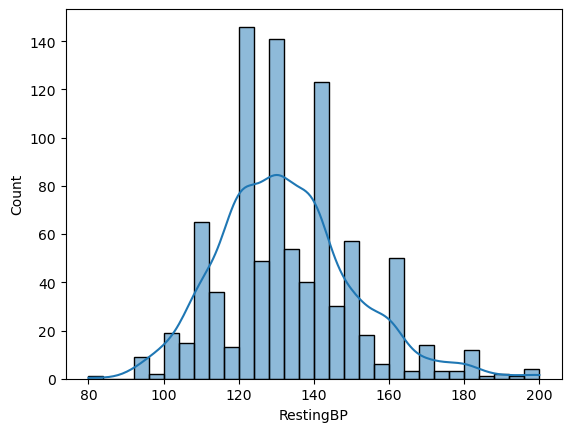

In [12]:
sns.histplot(df["RestingBP"], kde= True)

In [13]:
df["Cholesterol"].value_counts().sort_index(ascending=False)

Cholesterol
603      1
564      1
529      1
518      1
491      1
      ... 
113      1
110      1
100      2
85       1
0      171
Name: count, Length: 222, dtype: int64

In [14]:
df = df[df['Cholesterol'] != 0]

<Axes: xlabel='Cholesterol', ylabel='Count'>

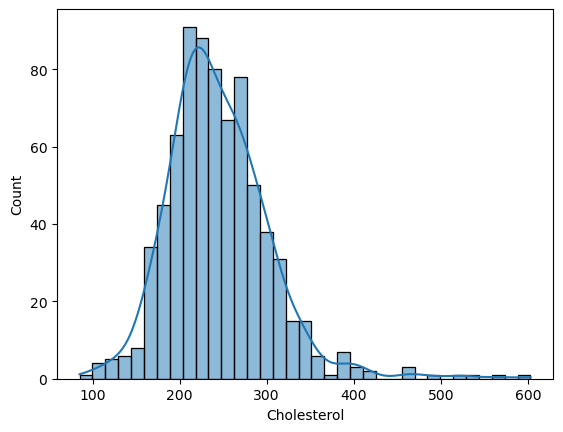

In [15]:
sns.histplot(df["Cholesterol"], kde= True)

<Axes: xlabel='ChestPainType', ylabel='count'>

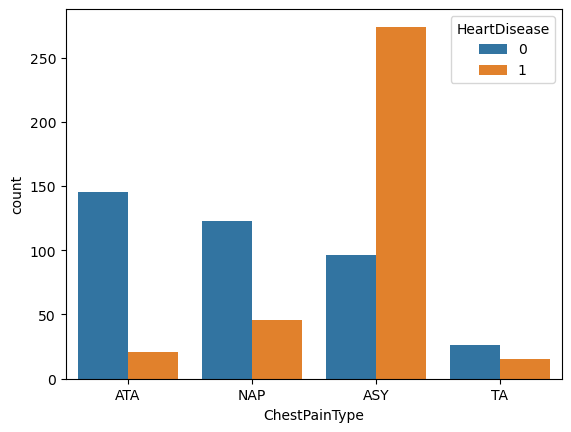

In [16]:
sns.countplot(x = df["ChestPainType"],hue=df["HeartDisease"])

In [17]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='RestingECG', ylabel='count'>

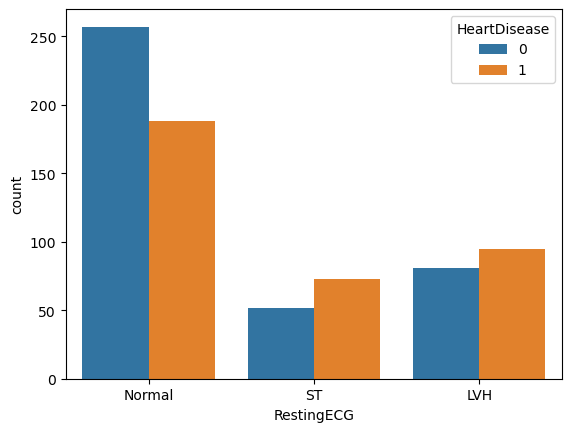

In [18]:
sns.countplot(x = df["RestingECG"],hue=df["HeartDisease"])

<Axes: xlabel='ExerciseAngina', ylabel='count'>

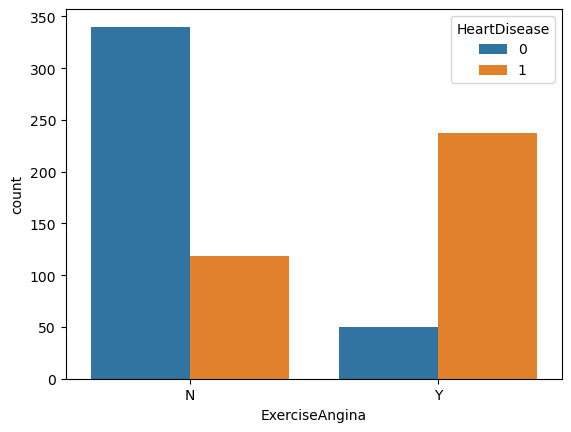

In [19]:
sns.countplot(x = df["ExerciseAngina"],hue=df["HeartDisease"])

<Axes: xlabel='ST_Slope', ylabel='count'>

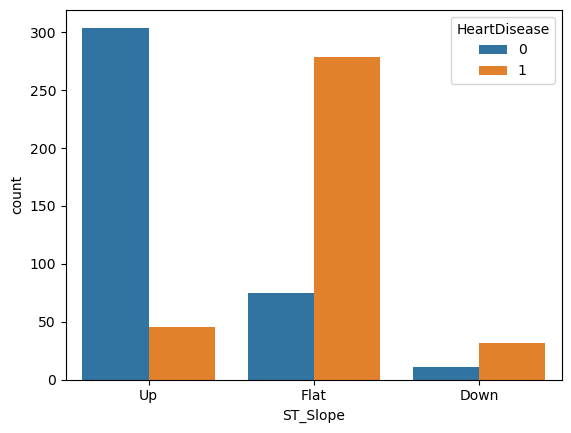

In [20]:
sns.countplot(x = df["ST_Slope"],hue=df["HeartDisease"])

In [21]:
df["Sex"] = df["Sex"].replace(to_replace=("M","F"), value=(0,1))

C:\Users\Prasad\AppData\Local\Temp\ipykernel_14896\1965741680.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace(to_replace=("M","F"), value=(0,1))


In [22]:
df["ExerciseAngina"] = df["ExerciseAngina"].replace(to_replace=("N","Y"), value=(0,1))

C:\Users\Prasad\AppData\Local\Temp\ipykernel_14896\3666400793.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ExerciseAngina"] = df["ExerciseAngina"].replace(to_replace=("N","Y"), value=(0,1))


In [23]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0


<Axes: >

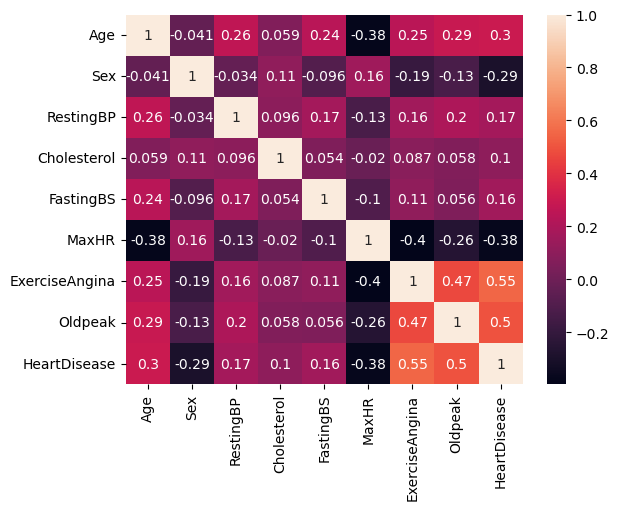

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    int64  
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    int64  
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 75.8+ KB


### Seperate the Input and Target Column

In [26]:
X = df.drop(columns="HeartDisease")
y = df["HeartDisease"]

In [27]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat


### Encode the Categorical Data

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [29]:
X = X.astype(int)

In [30]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0,1,0,0,1,0,0,1
1,49,1,160,180,0,156,0,1,0,1,0,1,0,1,0
2,37,0,130,283,0,98,0,0,1,0,0,0,1,0,1
3,48,1,138,214,0,108,1,1,0,0,0,1,0,1,0
4,54,0,150,195,0,122,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1,0,0,1,1,0,1,0
914,68,0,144,193,1,141,0,3,0,0,0,1,0,1,0
915,57,0,130,131,0,115,1,1,0,0,0,1,0,1,0
916,57,1,130,236,0,174,0,0,1,0,0,0,0,1,0


In [31]:
X.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

### Standardization 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Age', 'Sex', 'RestingBP', 'Cholesterol','MaxHR',
       'ExerciseAngina', 'Oldpeak'] 
X[cols] = scaler.fit_transform(X[cols])
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.356073,-0.568063,0.403980,0.750494,0,1.296470,-0.790742,-0.729175,1,0,0,1,0,0,1
1,-0.408656,1.760370,1.561980,-1.093405,0,0.643613,-0.790742,0.268925,0,1,0,1,0,1,0
2,-1.671879,-0.568063,-0.175019,0.648995,0,-1.722993,-0.790742,-0.729175,1,0,0,0,1,0,1
3,-0.513925,1.760370,0.288180,-0.518244,0,-1.314958,1.264636,0.268925,0,0,0,1,0,1,0
4,0.117686,-0.568063,0.982980,-0.839657,0,-0.743708,-0.790742,-0.729175,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.829731,-0.568063,-1.333019,0.327582,0,-0.335672,-0.790742,0.268925,0,0,1,1,0,1,0
914,1.591446,-0.568063,0.635580,-0.873490,1,0.031560,-0.790742,2.265125,0,0,0,1,0,1,0
915,0.433492,-0.568063,-0.175019,-1.922314,0,-1.029333,1.264636,0.268925,0,0,0,1,0,1,0
916,0.433492,1.760370,-0.175019,-0.146081,0,1.378077,-0.790742,-0.729175,1,0,0,0,0,1,0


### Model Development

#### Using Linear Regression Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test,y_pred)
r2


0.6196476687023074

In [34]:

# Get coefficients from trained Linear Regression model
coefficients = model.coef_

# Create DataFrame of features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value (strength of impact)
feature_importance['Absolute'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute', ascending=False)
print(feature_importance)

              Feature  Coefficient  Absolute
10   ChestPainType_TA    -0.284898  0.284898
9   ChestPainType_NAP    -0.217585  0.217585
14        ST_Slope_Up    -0.215226  0.215226
8   ChestPainType_ATA    -0.193926  0.193926
13      ST_Slope_Flat     0.159669  0.159669
6      ExerciseAngina     0.087340  0.087340
12      RestingECG_ST    -0.072253  0.072253
1                 Sex    -0.065980  0.065980
11  RestingECG_Normal    -0.052266  0.052266
7             Oldpeak     0.049400  0.049400
0                 Age     0.037591  0.037591
2           RestingBP     0.029291  0.029291
4           FastingBS     0.019943  0.019943
5               MaxHR    -0.005757  0.005757
3         Cholesterol    -0.001080  0.001080


#### Using Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred_log)
print("Accuracy:", acc)

# Confusion matrix and classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.9030303030303031

Confusion Matrix:
 [[75  6]
 [10 74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        81
           1       0.93      0.88      0.90        84

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165



In [36]:
importance = log_model.coef_[0]   # coefficients for each feature
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

              Feature  Importance
13      ST_Slope_Flat    1.147399
6      ExerciseAngina    0.529332
7             Oldpeak    0.397267
0                 Age    0.306676
2           RestingBP    0.254563
3         Cholesterol    0.038025
4           FastingBS    0.025684
5               MaxHR   -0.029329
11  RestingECG_Normal   -0.285815
12      RestingECG_ST   -0.453486
1                 Sex   -0.627438
14        ST_Slope_Up   -1.036408
8   ChestPainType_ATA   -1.237665
9   ChestPainType_NAP   -1.293830
10   ChestPainType_TA   -1.453444
